<a href="https://colab.research.google.com/github/AshboyOP/Health-Insurance-Prediction-Capstone-Project/blob/main/Classification_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [261]:
path = '/content/drive/MyDrive/Alma Capstone Projects/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df = pd.read_csv(path)

In [262]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [263]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [264]:
df.shape

(381109, 12)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [266]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## **Data Cleaning**

In [267]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# **Exploratory Data Analysis**

#**Univariate Analysis**

**Gender Count Plot**

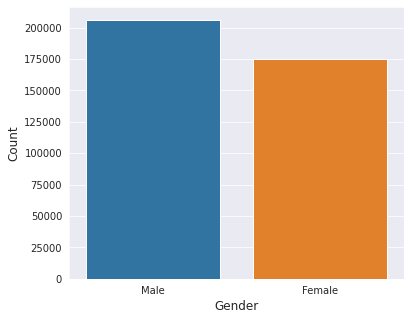

In [268]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.countplot(df['Gender'])
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Age Distribution Plot**

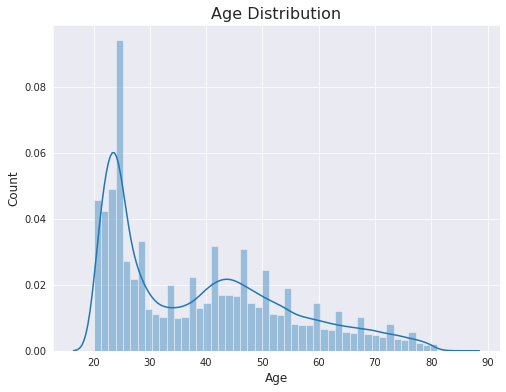

In [269]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.distplot(df['Age'])
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Drving Licence Plot**

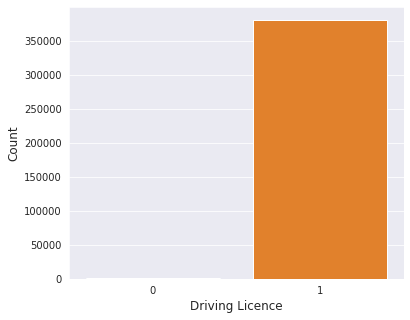

In [270]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.countplot(df['Driving_License'])
plt.xlabel('Driving Licence', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Previous Insurance Countplot**

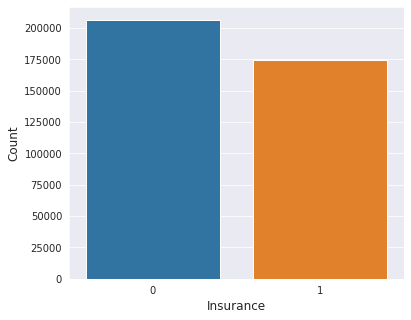

In [271]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.countplot(df['Previously_Insured'])
plt.xlabel('Insurance', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Vehicle Age Countplot**

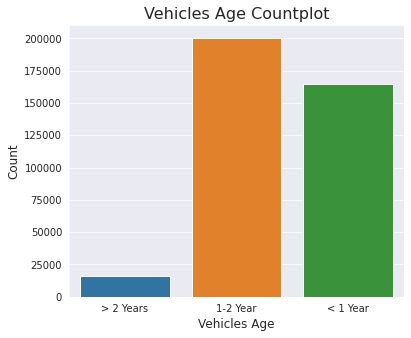

In [272]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.countplot(df['Vehicle_Age'])
plt.title('Vehicles Age Countplot', fontsize=16)
plt.xlabel('Vehicles Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Vehicle Damage Countplot**

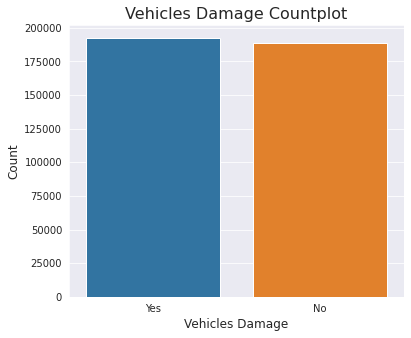

In [273]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.countplot(df['Vehicle_Damage'])
plt.title('Vehicles Damage Countplot', fontsize=16)
plt.xlabel('Vehicles Damage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Annual Premium Distribution Plot**

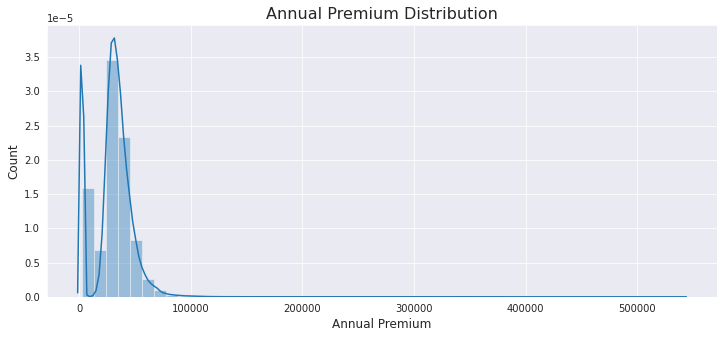

In [274]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
sns.distplot(df['Annual_Premium'])
plt.title('Annual Premium Distribution', fontsize=16)
plt.xlabel('Annual Premium', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Responses Plot**

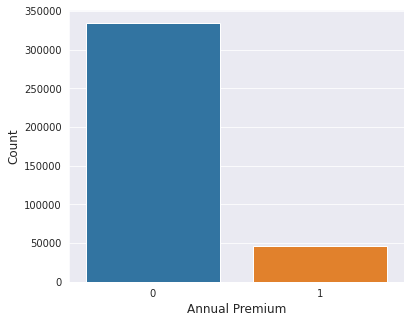

In [275]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.countplot(df['Response'])
plt.xlabel('Annual Premium', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# **Bivariate Analysis**

**Gender vs Responses**

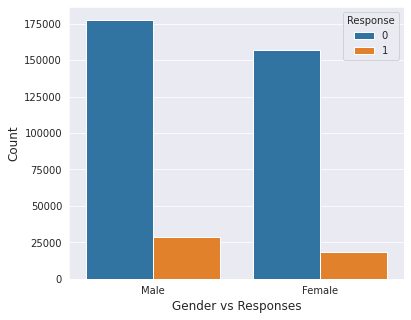

In [276]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.countplot(df['Gender'], hue=df['Response'])
plt.xlabel('Gender vs Responses', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Age vs Responses**

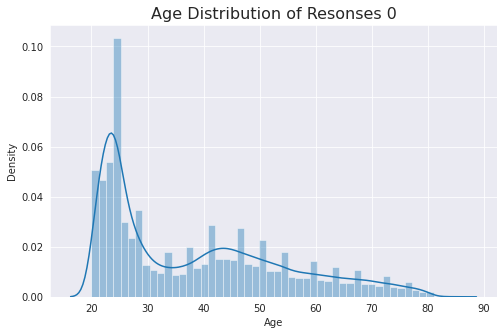

In [277]:
data = df[['Age', 'Response']]
data1 = data[data['Response'] == 0]
data2 = data[data['Response'] == 1]
plt.figure(figsize=(8,5))
sns.distplot(data1['Age'], label = 'Response 0')
plt.title('Age Distribution of Resonses 0', fontsize=16)
plt.show()

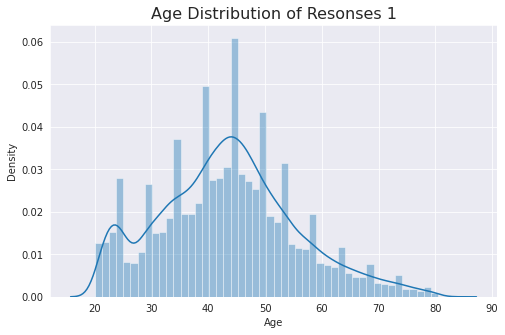

In [278]:
plt.figure(figsize=(8,5))
sns.distplot(data2['Age'], label = 'Response 1')
plt.title('Age Distribution of Resonses 1', fontsize=16)
plt.show()

**Vehicle Age vs Responses**

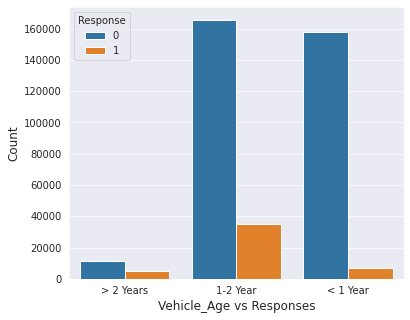

In [279]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.countplot(df['Vehicle_Age'], hue=df['Response'])
plt.xlabel('Vehicle_Age vs Responses', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Vehicle Damage vs Response**

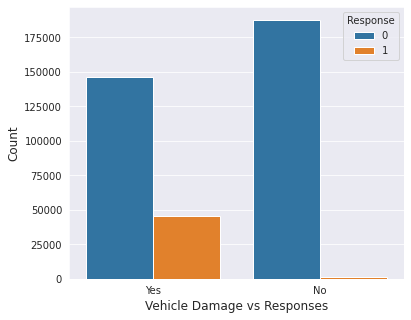

In [280]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.countplot(df['Vehicle_Damage'], hue=df['Response'])
plt.xlabel('Vehicle Damage vs Responses', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## **Outlier Detection and Imputation**

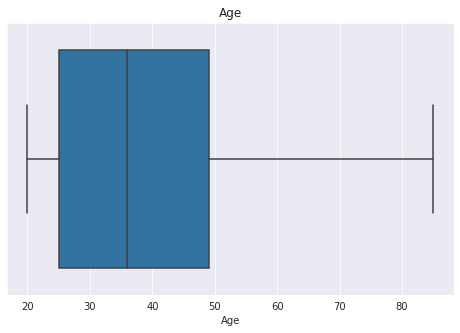

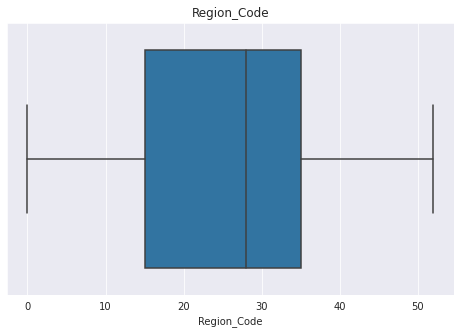

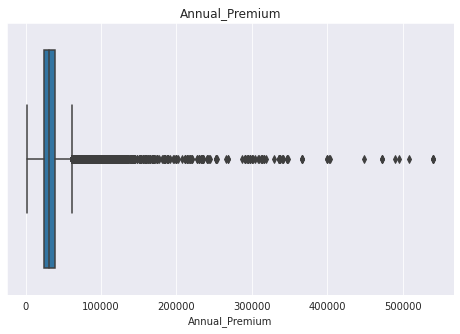

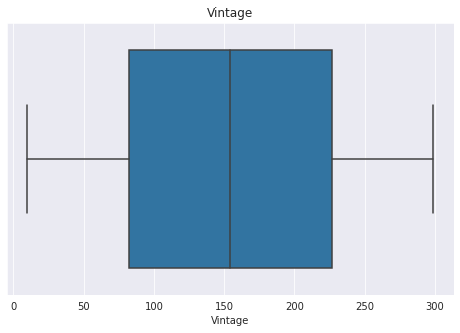

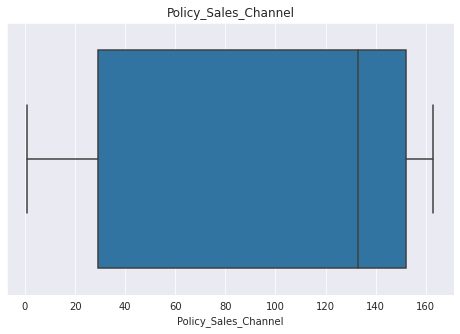

In [281]:
# Seperating the Numerical Columns
num_columns = df[['Age','Region_Code','Annual_Premium','Vintage','Policy_Sales_Channel']]
for i in num_columns.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(num_columns[i])
    plt.title(i, fontsize=12)
    plt.show()

In [282]:
# Treating Outliers using IQR Method
data = df['Annual_Premium'].sort_values(ascending=True)
q1 = data.quantile(.25)
q3 = data.quantile(.75)
IQR = q3 - q1
low_limit = q1 - 1.5*IQR
high_limit = q3 + 1.5*IQR
outlier = df['Annual_Premium'][(df['Annual_Premium'] < low_limit) | (df['Annual_Premium']>high_limit)]
outlier.head()

25     61964.0
37     76251.0
67     66338.0
139    62164.0
149    76651.0
Name: Annual_Premium, dtype: float64

In [283]:
# Replacing the Outlier values by Median of the column
median = np.median(df['Annual_Premium'])
df['Annual_Premium'] = np.where((df['Annual_Premium']<low_limit) | (df['Annual_Premium']>high_limit), median,df['Annual_Premium'])
df.tail(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


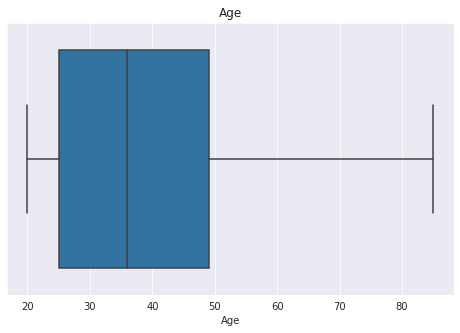

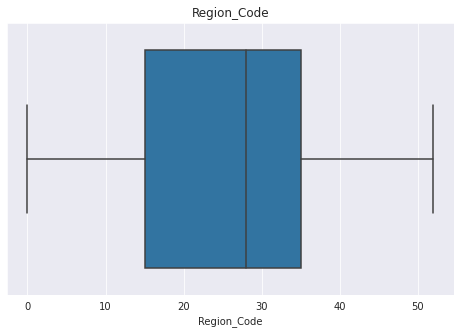

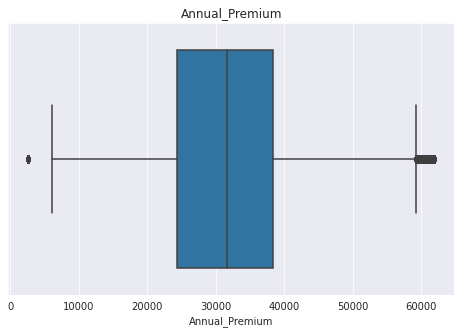

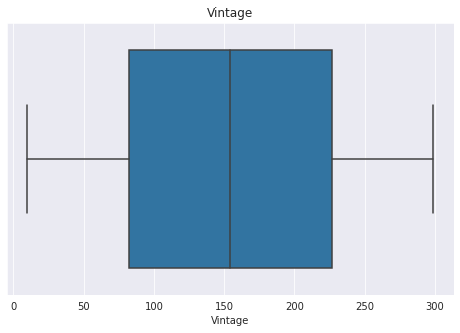

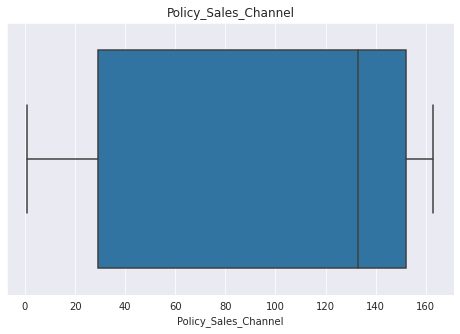

In [284]:
num_columns = df[['Age','Region_Code','Annual_Premium','Vintage','Policy_Sales_Channel']]
for i in num_columns.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(num_columns[i])
    plt.title(i, fontsize=12)
    plt.show()

# **Feature Engineering**

In [285]:
# Dropping the "id" column
df.drop(columns=['id'], inplace=True)
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [286]:
# Changing Gender category column to numeric data
df['Gender'] = df['Gender'].replace({'Male' : 1, 'Female':0})
df['Gender'].value_counts()

1    206089
0    175020
Name: Gender, dtype: int64

In [287]:
# Changing Vehicle age column
df = pd.get_dummies(df, columns=['Vehicle_Age'])
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,Yes,40454.0,26.0,217,1,0,0,1
1,1,76,1,3.0,0,No,33536.0,26.0,183,0,1,0,0
2,1,47,1,28.0,0,Yes,38294.0,26.0,27,1,0,0,1
3,1,21,1,11.0,1,No,28619.0,152.0,203,0,0,1,0
4,0,29,1,41.0,1,No,27496.0,152.0,39,0,0,1,0


In [288]:
# Vehicle Damage
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace({'Yes':1, 'No':0})
df.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1


In [289]:
# Feature Selection using Correlation Matrix
df.corr()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
Gender,1.000000,0.145545,-0.018374,0.000604,-0.081932,0.091606,0.001683,-0.111159,-0.002517,0.052440,0.147633,-0.166280,0.043155
Age,0.145545,1.000000,-0.079782,0.042574,-0.254682,0.267534,0.051309,-0.577826,-0.001264,0.111147,0.692910,-0.787775,0.220694
Driving_License,-0.018374,-0.079782,1.000000,-0.001081,0.014969,-0.016622,-0.010127,0.043731,-0.000848,0.010155,-0.037403,0.040215,-0.006211
Region_Code,0.000604,0.042574,-0.001081,1.000000,-0.024659,0.028235,-0.002929,-0.042420,-0.002750,0.010570,0.038055,-0.044250,0.014555
Previously_Insured,-0.081932,-0.254682,0.014969,-0.024659,1.000000,-0.824143,0.013587,0.219381,0.002537,-0.341170,-0.279077,0.358773,-0.191352
Vehicle_Damage,0.091606,0.267534,-0.016622,0.028235,-0.824143,1.000000,0.000940,-0.224377,-0.002064,0.354400,0.284717,-0.370778,0.206961
Annual_Premium,0.001683,0.051309,-0.010127,-0.002929,0.013587,0.000940,1.000000,-0.106765,-0.000868,0.018639,-0.014270,-0.007104,0.053066
Policy_Sales_Channel,-0.111159,-0.577826,0.043731,-0.042420,0.219381,-0.224377,-0.106765,1.000000,0.000002,-0.139042,-0.508265,0.571516,-0.146238
Vintage,-0.002517,-0.001264,-0.000848,-0.002750,0.002537,-0.002064,-0.000868,0.000002,1.000000,-0.001050,-0.002632,0.002410,0.000600
Response,0.052440,0.111147,0.010155,0.010570,-0.341170,0.354400,0.018639,-0.139042,-0.001050,1.000000,0.164317,-0.209878,0.109300


In [290]:
# Dropping the Irrelavant Columns
df = df[['Gender', 'Age', 'Driving_License','Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Response', 
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Years']]

**Splitting the data into Training and Testing sets**

In [291]:
X = df.drop(columns=['Response'])
y = df['Response']
print(X.shape)
print(y.shape)

(381109, 10)
(381109,)


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42)
print('Shape of Training Data : \nDependent Variable --> {}  Target Variable --> {}'.format(X_train.shape, y_train.shape))
print('Shape of Testing Data : \nDependent Variable --> {}  Target Variable --> {}'.format(X_test.shape, y_test.shape))

Shape of Training Data : 
Dependent Variable --> (285831, 10)  Target Variable --> (285831,)
Shape of Testing Data : 
Dependent Variable --> (95278, 10)  Target Variable --> (95278,)


## **Model Building**

**Logistic Regression Model**

In [296]:
# Creating instance of Logistic Regression Model
Model_1 = LogisticRegression()

In [297]:
# Training the Model
Model_1.fit(X_train, y_train)

LogisticRegression()

In [298]:
# Making predictions
pred_1 = Model_1.predict(X_test)

**Model Evaluation Metrices**

In [299]:
# Accuracy Score
Accuracy = accuracy_score(y_test,pred_1)
print("Accuracy Score : \n{:.2f}%".format(Accuracy*100))

# Confusion Matrix
Confusion_Matrix = confusion_matrix(y_test,pred_1)
print("Confusion Matrix : \n{}".format(Confusion_Matrix))

# Mean Squared Error
MSE = mean_squared_error(y_test,pred_1)
print("Mean Squared Error : \n{:.4f}".format(MSE))

Accuracy Score : 
87.55%
Confusion Matrix : 
[[83376   137]
 [11721    44]]
Mean Squared Error : 
0.1245
